In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import time
import importlib

In [2]:
import sys
sys.path.append("../../../libs_bell")
from lib_preprocessing import job_ids_to_result, flatten_results_jobs_list, arrange_results_list_tensored3, results_list_to_hist_list

In [3]:
with open("pkls/raw_hist_list.pkl", "rb") as f:
    raw_hist_list = pickle.load(f)
with open("pkls/results_meas_cal.pkl", "rb") as f:
    results_meas_cal = pickle.load(f)

In [4]:
from libs_qrem import NationEtalFilter
from qiskit.ignis.mitigation.measurement import TensoredMeasFitter

In [5]:
max_size = 65
max_length = 64
nation_lu_mitigator_list = []
for n in range(2, max_size + 1):
    mit_pattern = [[i] for i in range(n)]
    meas_fitter = TensoredMeasFitter(results_meas_cal[n - 1], mit_pattern=mit_pattern)
    nation_lu_mitigator_list.append(NationEtalFilter(n, meas_fitter.cal_matrices))
    if n % 10 == 0:
        print("size", n, "finished")
print("length of nation_lu_mitigator_list: ", len(nation_lu_mitigator_list))

size 10 finished
size 20 finished
size 30 finished
size 40 finished
size 50 finished
size 60 finished
length of nation_lu_mitigator_list:  64


In [6]:
for i in range(max_length):
    t1 = time.perf_counter()
    _ = nation_lu_mitigator_list[i].apply(raw_hist_list[i + 1], method="lu")
    t2 = time.perf_counter()
    print(i + 1, "th finished (", i + 2, "qubits,", t2 - t1, "s )")

1 th finished ( 2 qubits, 8.581500000026665e-05 s )
2 th finished ( 3 qubits, 0.00011695100000075342 s )
3 th finished ( 4 qubits, 0.00010507300000028863 s )
4 th finished ( 5 qubits, 0.00029467699999941033 s )
5 th finished ( 6 qubits, 0.0004426380000008834 s )
6 th finished ( 7 qubits, 0.0005695160000005473 s )
7 th finished ( 8 qubits, 0.0009800740000009966 s )
8 th finished ( 9 qubits, 0.0015343360000006356 s )
9 th finished ( 10 qubits, 0.0033011799999993485 s )
10 th finished ( 11 qubits, 0.003920071999999664 s )
11 th finished ( 12 qubits, 0.007609794000000392 s )
12 th finished ( 13 qubits, 0.011371948999999049 s )
13 th finished ( 14 qubits, 0.01797575500000015 s )
14 th finished ( 15 qubits, 0.027667455999999646 s )
15 th finished ( 16 qubits, 0.0360354309999984 s )
16 th finished ( 17 qubits, 0.07269906900000045 s )
17 th finished ( 18 qubits, 0.09825280000000092 s )
18 th finished ( 19 qubits, 0.12660187800000067 s )
19 th finished ( 20 qubits, 0.16889354399999945 s )
20 th

In [7]:
nation_lu_mitigator_info = []
for i in range(max_length):
    t1 = time.perf_counter()
    nation_lu_mitigator_info.append({"exact_one_norm_of_inv_reduced_A": nation_lu_mitigator_list[i].exact_one_norm_of_inv_reduced_A(),
                                     "iterative_one_norm_of_inv_reduced_A": nation_lu_mitigator_list[i].iterative_one_norm_of_inv_reduced_A(method="lu"),
                                     "mitigated_hist": nation_lu_mitigator_list[i].mitigated_hist(),
                                     "x_s": nation_lu_mitigator_list[i].x_s(),
                                     "x_hat": nation_lu_mitigator_list[i].x_hat(),
                                     "x_tilde": nation_lu_mitigator_list[i].x_tilde(),
                                     "sum_of_x": nation_lu_mitigator_list[i].sum_of_x(),
                                     "sum_of_x_hat": nation_lu_mitigator_list[i].sum_of_x_hat(),
                                     "sum_of_x_tilde": nation_lu_mitigator_list[i].sum_of_x_tilde(),
                                     "indices_to_keys_vector": nation_lu_mitigator_list[i].indices_to_keys_vector(),
                                     "times": nation_lu_mitigator_list[i].times(),
                                     "expval": nation_lu_mitigator_list[i].expval(),
                                     "mitigation_stddev": nation_lu_mitigator_list[i].mitigation_stddev(norm_type = "exact"),
                                     })
    t2 = time.perf_counter()
    print(i + 1, "th finished (", i + 2, "qubits,", t2 - t1, "s )")

1 th finished ( 2 qubits, 0.0005926420000150756 s )
2 th finished ( 3 qubits, 4.622000000154003e-05 s )
3 th finished ( 4 qubits, 9.005100002923427e-05 s )
4 th finished ( 5 qubits, 0.0002503900000192516 s )
5 th finished ( 6 qubits, 0.0007111180000265449 s )
6 th finished ( 7 qubits, 0.0007684049999738818 s )
7 th finished ( 8 qubits, 0.0021253449999676377 s )
8 th finished ( 9 qubits, 0.004092045999982474 s )
9 th finished ( 10 qubits, 0.006846039999970799 s )
10 th finished ( 11 qubits, 0.011334871999963525 s )
11 th finished ( 12 qubits, 0.018019696999999724 s )
12 th finished ( 13 qubits, 0.03154450800002451 s )
13 th finished ( 14 qubits, 0.053954051000005165 s )
14 th finished ( 15 qubits, 0.09060153399997262 s )
15 th finished ( 16 qubits, 0.10804784400005474 s )
16 th finished ( 17 qubits, 0.24848643000001402 s )
17 th finished ( 18 qubits, 0.34225173800001585 s )
18 th finished ( 19 qubits, 0.5126225700000191 s )
19 th finished ( 20 qubits, 0.7494827560000203 s )
20 th finish

In [8]:
with open("./pkls/nation_lu_mitigator_info.pkl", "wb") as f:
    pickle.dump(nation_lu_mitigator_info, f)

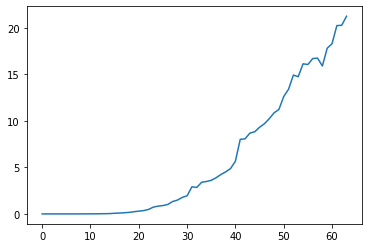

In [9]:
plt.plot([nation_lu_mitigator_list[i].times()["total"] for i in range(max_length)])